# Intoduction

### Dataset definition

This dataset shows sales transaction of coffee shop. I will explain the sales analysis on this dataset. The objective of this explanatory data analysis is to understand the structure, relationships among different features and handling missing data. Once the dataset is cleaned, we can predict customer purchasing  behavior using prediction modeling.After cleaning and preprocessing the data, we can apply data visualization techniques like bar charts, heatmap to uncover relationships..There are 11 columns in this dataset. They are:   
* transaction_id :- the number of transactions
* transaction_date:- the date of the transaction
* transaction_time:- the time of transaction
* transaction_qty:- number of items purchased
* store_id :- store identifier
* store_location:- store address
* product_id:- product identifier
* unit_price:- cost per item
* product_category:-category of the product
* product_type:- classification of the product
* product_detail:-details of the product

This dataset is collected from Kaggle repository.
https://www.kaggle.com/datasets/mannarmohamedsayed/coffee-shop-analysis

### Business Questions

1. Which product type generates highest revenue ?
2. Which product category are the most preferred ?
3. Which pricing strategy maximize revenue ?
4. How does the sales performance differ by store locations ?
5. How can the least popular product be sold to improve sales ?
6. Which store has the highest frequency of transaction ?
7. What time of the day have highest sales ?
8. How do sales differ by product category at peak hours ?
9. How does location impact customer for product category ?

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas.api.types import CategoricalDtype

In [ ]:
df = pd.read_csv("coffee_shop.csv")
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
df.shape

(149116, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


The dataset was clean but I injected some null values to the dataset because I want to understand how to handle null values.

In [ ]:
np.random.seed(42)
for _ in range (1000):
    i = np.random.randint(0,df.shape[0])
    j = np.random.randint(0,df.shape[1])
    df.iloc[i,j] = None
display(df.isnull().sum())
df.to_csv("coffee_up.csv", index=False)

,0
transaction_id,102
transaction_date,82
transaction_time,93
transaction_qty,95
store_id,101
store_location,80
product_id,87
unit_price,92
product_category,83
product_type,96


# Data Preprocessing


In [ ]:
#Handling missing values and droping unnecessary columns. Replacing null values by mean.
coffee_up = pd.read_csv("coffee_up.csv")
df = coffee_up.copy()
df = df.drop(["transaction_id", "store_id", "product_id"], axis = 1)

df["unit_price"] = df["unit_price"].fillna(df["unit_price"].mean())
df["transaction_qty"] = df["transaction_qty"].fillna(df["transaction_qty"].median())

### I replaced null values:-
*   store location by unknown
*   product catogory by unknown
*   product type by mode
*   product detail by unknown





In [ ]:
df["store_location"] = df["store_location"].fillna("Unknown")
df["product_category"] = df["product_category"].fillna("Unknown")
df["product_type"] = df["product_type"].fillna(df["product_type"].mode()[0])
df["product_detail"] = df["product_detail"].fillna("Unknown")

In [ ]:
# Replacing null values from previous column
df["transaction_date"] = df["transaction_date"].ffill()
df["transaction_time"] = df["transaction_time"].ffill()
display(df.isnull().sum())

,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_location,0
unit_price,0
product_category,0
product_type,0
product_detail,0


In [ ]:
# Combining transaction date and transaction time in one column tra_datetime for analysis
df["tra_datetime"] = df["transaction_date"] + ' ' + df["transaction_time"]
df["tra_datetime"] = pd.to_datetime(df['tra_datetime'])
df = df.drop(columns=["transaction_date", "transaction_time"])
df["transaction_qty"] = df["transaction_qty"].astype(int)
df["total_price"] = df["transaction_qty"] * df["unit_price"]

In [ ]:
cld_df = df.copy()
cld_df.head()

,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,tra_datetime,total_price
0,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11,6.0
1,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56,6.2
2,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:04,9.0
3,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:24,2.0
4,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:22:41,6.2


In [ ]:
df = df.drop_duplicates()
df.shape

(148722, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148722 entries, 0 to 149115
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_qty   148722 non-null  int64         
 1   store_location    148722 non-null  object        
 2   unit_price        148722 non-null  float64       
 3   product_category  148722 non-null  object        
 4   product_type      148722 non-null  object        
 5   product_detail    148722 non-null  object        
 6   tra_datetime      148722 non-null  datetime64[ns]
 7   total_price       148722 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 10.2+ MB


In [ ]:
df.describe()

,transaction_qty,unit_price,tra_datetime,total_price
count,148722.000000,148722.000000,148722,148722.000000
mean,1.439148,3.381685,2023-04-16 00:03:07.809019136,4.688598
min,1.000000,0.800000,2023-01-01 07:06:11,0.800000
25%,1.000000,2.500000,2023-03-06 13:21:39,3.000000
50%,1.000000,3.000000,2023-04-24 08:18:27,3.750000
75%,2.000000,3.750000,2023-05-30 07:12:59.249999872,6.000000
max,8.000000,45.000000,2023-06-30 20:57:19,360.000000
std,0.542712,2.661113,NaN,4.231741


## Price Distribution
Most transactions have low prices.

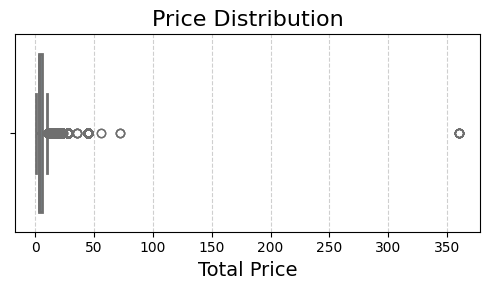

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(
    x=df["total_price"],
    color="skyblue",
    linewidth=2
)
plt.title("Price Distribution", fontsize=16)
plt.xlabel("Total Price", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Unique values of the data
unique_counts = df.nunique()
unique_counts

,0
transaction_qty,6
store_location,4
unit_price,42
product_category,10
product_type,29
product_detail,81
tra_datetime,116082
total_price,78


High Positive correlation in unit price vs total price and weak negative correlation in unit price vs transaction_qty.


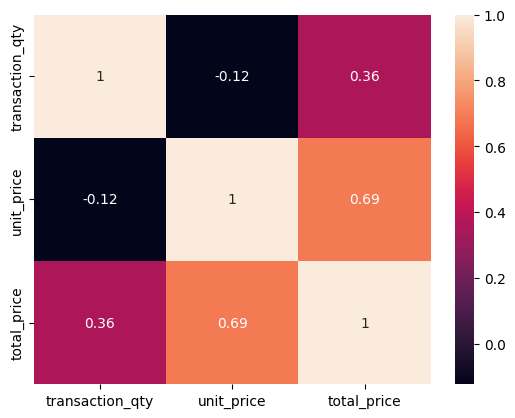

In [ ]:
# correlation heatmap for numerical values.
num_column = df[["transaction_qty", "unit_price", "total_price"]]
sns.heatmap(num_column.corr(), annot=True)
plt.show()

# Data Visualization
## Top5 Most Popular Product Types With Highest Revenue
This bar chart shows the top 5 product types with highest revenue. Barista Espresso has the highest revenue.

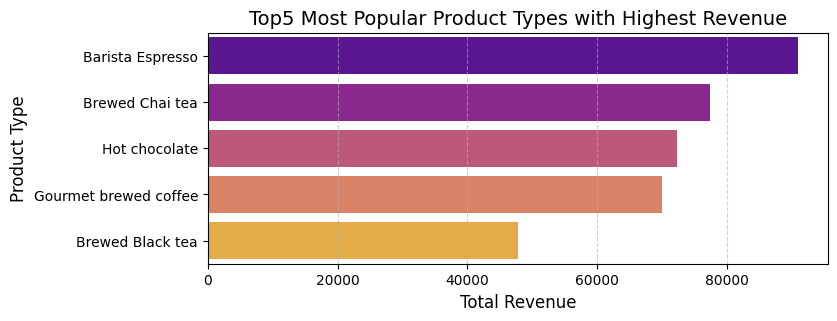

In [ ]:
# Grouping by product type and adds the total price for each product type to calcuulate total revenue.
prod_reve = df.groupby("product_type")["total_price"].sum().reset_index()

prod_reve = prod_reve.sort_values(by="total_price", ascending=False)
top5_prod_types = prod_reve.head(5)

plt.figure(figsize=(8, 3))
sns.barplot(
    x="total_price",
    y="product_type",
    data=top5_prod_types,
    hue="product_type",
    palette="plasma",
    dodge=False
)
plt.title("Top5 Most Popular Product Types with Highest Revenue", fontsize=14)
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product Type", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

## Most Preferred Product Categories
This bar chart shows the most preferred product categories. Coffee is the most preferred product.

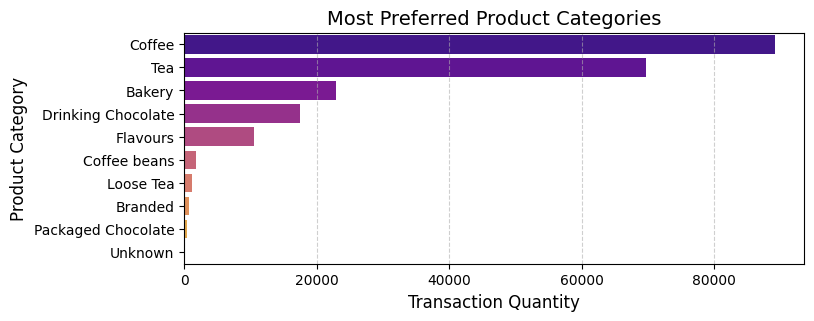

In [ ]:
# Grouping by product category and adds the transaction qty for each product category to calcuulate transaction qty.
cate_pref = df.groupby("product_category")["transaction_qty"].sum().reset_index()
cate_pref = cate_pref.sort_values(by="transaction_qty", ascending=False)

plt.figure(figsize=(8, 3))
sns.barplot(
    x="transaction_qty",
    y="product_category",
    data=cate_pref,
    hue="product_category",
    palette="plasma",
    dodge=False
)
plt.title("Most Preferred Product Categories", fontsize=14,)
plt.xlabel("Transaction Quantity", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

## Unit Price vs Transaction Quality
In this relationship, I can say that with high unit price, there is low transaction quantity

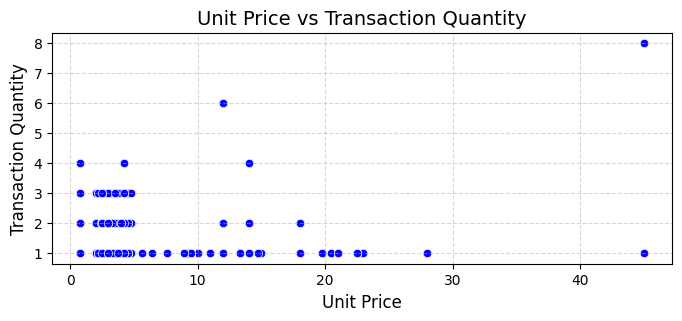

In [ ]:
#Relationship between unit price and transaction qty.
plt.figure(figsize=(8, 3))
sns.scatterplot(x="unit_price", y="transaction_qty", data=df, color="blue")
plt.title("Unit Price vs Transaction Quantity", fontsize=14)
plt.xlabel("Unit Price", fontsize=12)
plt.ylabel("Transaction Quantity", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Highest Transaction Frequency
In this transaction frequency, Hell's kitchen and Astoria have highest transaction.They are the top 2 best locations.

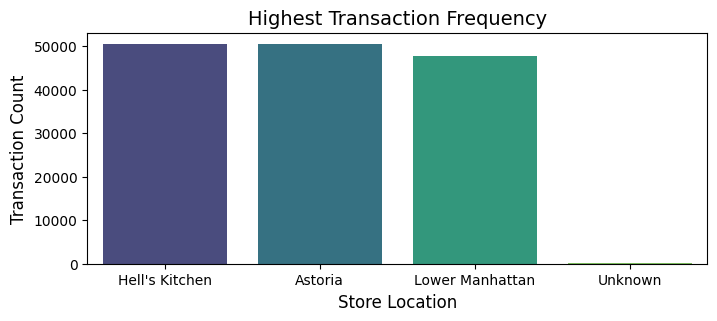

,store_location,tran_count
0,Hell's Kitchen,50575
1,Astoria,50423
2,Lower Manhattan,47644
3,Unknown,80


In [ ]:
# Counting number of transactions for each store location.
tran_freq = df["store_location"].value_counts().reset_index()
tran_freq.columns = ["store_location", "tran_count"]

plt.figure(figsize=(8, 3))
sns.barplot(
    x="store_location",
    y="tran_count",
    data=tran_freq,
    hue="store_location",
    palette="viridis"
)
plt.title("Highest Transaction Frequency", fontsize=14)
plt.xlabel("Store Location", fontsize=12)
plt.ylabel("Transaction Count", fontsize=12)
plt.show()
tran_freq

## Hours with highest number of transaction
There is more sales in the morning from 7am - 10am.The highest sales is at 10am.But from 5pm-8pm the sales decline.

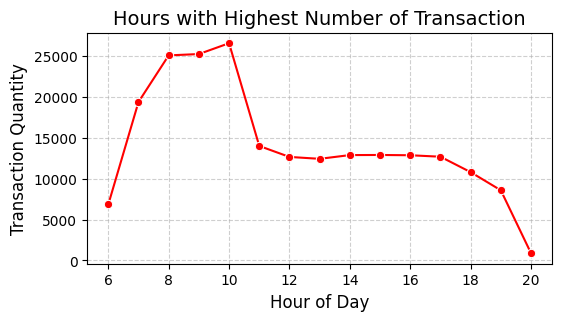

In [ ]:
# Calculating the peak hour of the transaction
df["hour"] = df["tra_datetime"].dt.hour
hourly_tran = df.groupby("hour")["transaction_qty"].sum().reset_index()

plt.figure(figsize=(6, 3))
sns.lineplot(
    x="hour",
    y="transaction_qty",
    data=hourly_tran,
    marker="o",
    color="red")
plt.title("Hours with Highest Number of Transaction", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Transaction Quantity", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Sales Performance by Store Location
Hell's kitchen has the maximum sales revenue.

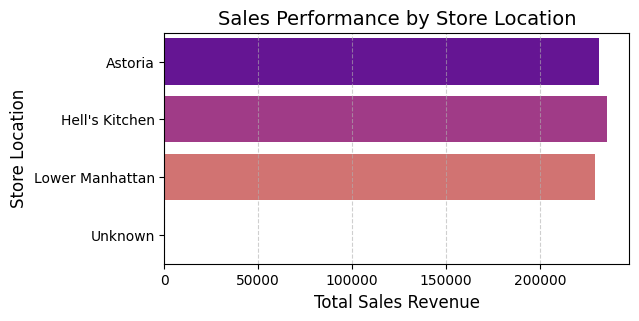

In [ ]:
# Grouping the data by store location and calculating total price and transaction qty
loc_sales = df.groupby("store_location")[["total_price", "transaction_qty"]].sum().reset_index()
plt.figure(figsize=(6, 3))
sns.barplot(
    x="total_price",
    y="store_location",
    data=loc_sales,
    hue="store_location",
    palette="plasma",
    dodge=False
)
plt.title("Sales Performance by Store Location", fontsize=14,)
plt.xlabel("Total Sales Revenue", fontsize=12)
plt.ylabel("Store Location", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

## Low Demand Products
Dark chocolate and Spicy eye opener chai have minimum transaction quantity.

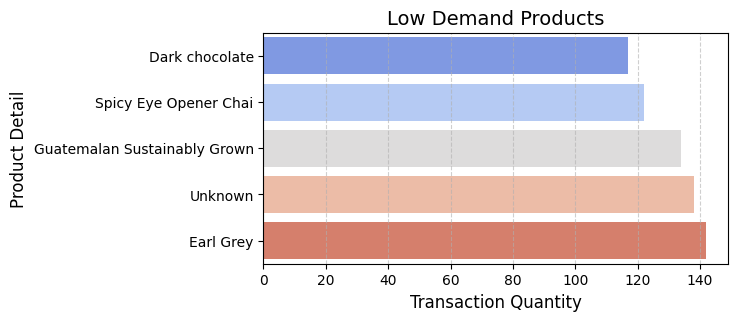

In [ ]:
# Grouping by product detail and adds transaction qty for each product detail
low_demand_prod = df.groupby("product_detail")["transaction_qty"].sum().reset_index()
low_demand_prod = low_demand_prod.sort_values(by="transaction_qty", ascending=True).head(5)

plt.figure(figsize=(6, 3))
sns.barplot(
    x="transaction_qty",
    y="product_detail",
    data=low_demand_prod,
    hue="product_detail",
    palette="coolwarm",
    dodge=False
)
plt.title("Low Demand Products", fontsize=14)
plt.xlabel("Transaction Quantity", fontsize=12)
plt.ylabel("Product Detail", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

## Distribution of Unit Price
most transactions have low prices with an average of 4.6

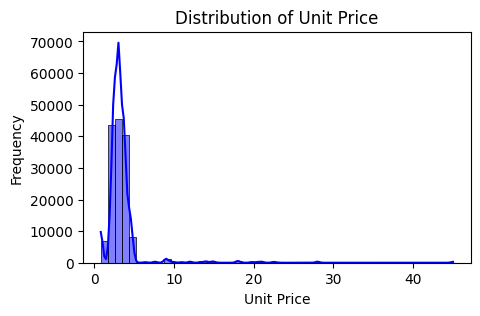

In [ ]:
# Calculating distribution of unit price
plt.figure(figsize=(5, 3))
sns.histplot(df["unit_price"], kde=True, bins=50, color="blue")
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()

## Transaction Quantity by Product Category
Coffee and Tea are the most prefered products.

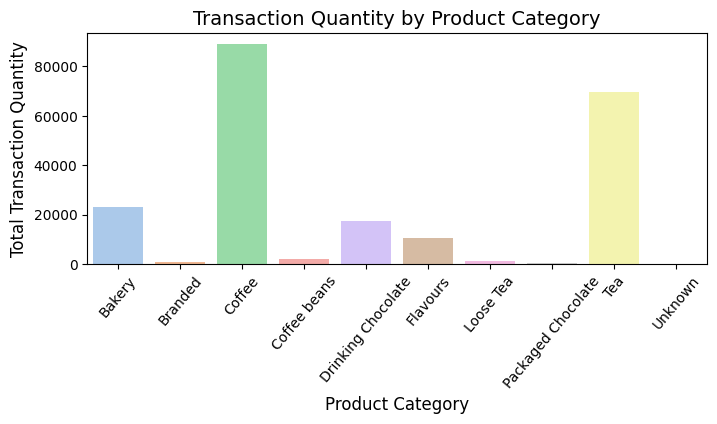

In [ ]:
# Grouping by product category and adds transaction qty for each product category
category_details = df.groupby("product_category")["transaction_qty"].sum().reset_index()
plt.figure(figsize=(8, 3))
sns.barplot(
    x="product_category",
    y="transaction_qty",
    data=category_details,
    palette="pastel",
    hue="product_category",
    dodge=False,
)
plt.xticks(rotation=50)
plt.title("Transaction Quantity by Product Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Transaction Quantity", fontsize=12)
plt.xticks(rotation=50)
plt.show()

## Average Unit Price by Product Category.
Coffee beans and Branded product category have the highest unit prices.

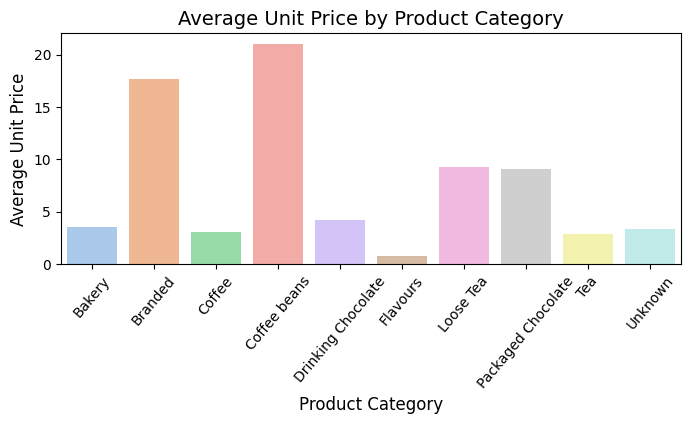

In [ ]:
# Gruoping by product category and calculates unit price for each product category by mean
cat_price = df.groupby("product_category")["unit_price"].mean().reset_index()
plt.figure(figsize=(8, 3))
sns.barplot(
    x="product_category",
    y="unit_price",
    data=cat_price,
    palette="pastel",
    hue="product_category",
    dodge=False,
)
plt.title("Average Unit Price by Product Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Average Unit Price", fontsize=12)
plt.xticks(rotation=50, fontsize=10)
plt.show()

## Daily Sales Trends
In general, the daily sales is increasing

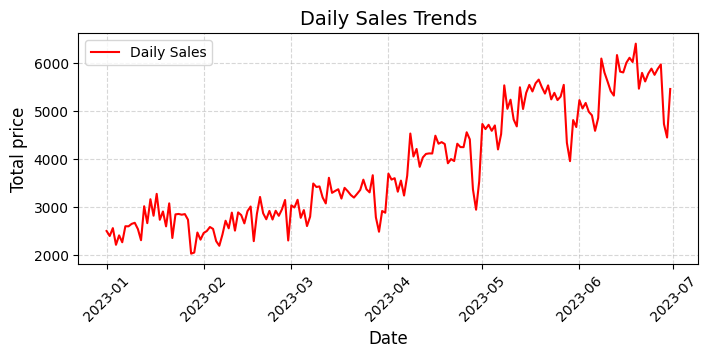

In [ ]:
# Extracting the date from tra_datetime
df["date"] = df["tra_datetime"].dt.date
daily_sales = df.groupby("date")["total_price"].sum().reset_index()
plt.figure(figsize=(8, 3))
sns.lineplot(
    x="date",
    y="total_price",
    data=daily_sales,
    color="red",
    label="Daily Sales"
)
plt.title("Daily Sales Trends", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total price", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Transaction Quality by Store Location
Based on the location, Hell's kitchen and Lower manhattan have highest transactions.

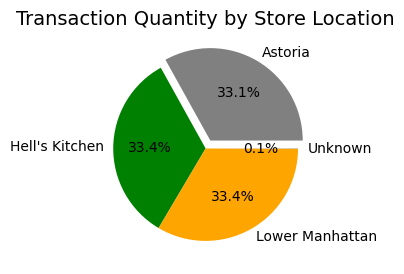

,store_location,transaction_qty
0,Astoria,70782
1,Hell's Kitchen,71557
2,Lower Manhattan,71568
3,Unknown,126


In [ ]:
# Gruoping by store location and calculates transaction qty for each store location
store_sums = df.groupby("store_location")["transaction_qty"].sum().reset_index()

plt.figure(figsize=(3, 3))
plt.pie(store_sums["transaction_qty"],
        labels=store_sums["store_location"],
        autopct="%1.1f%%",
        colors=["gray", "green", "orange"],
        explode=[0.1, 0, 0, 0],
)
plt.title("Transaction Quantity by Store Location", fontsize=14)
plt.show()
store_sums

## Monthly Sales Visualization
This shows in June and May, there is high transactions.

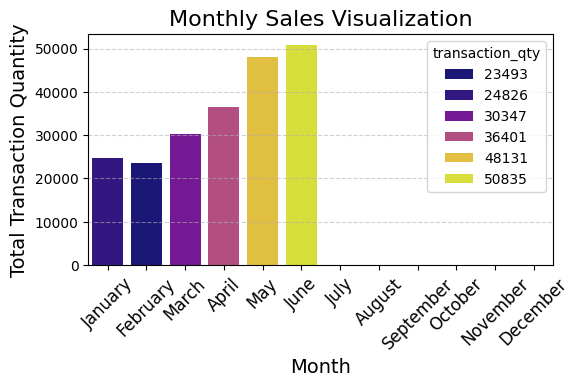

In [ ]:
# Monthly sales for the transaction qty
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
df["month"] = pd.to_datetime(df["tra_datetime"]).dt.month_name()
monthly_sales = df.groupby("month")["transaction_qty"].sum().reset_index()

monthly_sales["month"] = monthly_sales["month"].astype(
    CategoricalDtype(categories=month_order, ordered=True)
)
monthly_sales = monthly_sales.sort_values("month")
plt.figure(figsize=(6, 3))
sns.barplot(
    x="month",
    y="transaction_qty",
    data=monthly_sales,
    hue="transaction_qty",
    palette="plasma",
    dodge=False
)
plt.title("Monthly Sales Visualization", fontsize=16,)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Transaction Quantity", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## Sales by Product Category at Peak Hours
The peak hour sales for most of the products is from 8am - 10am. Coffe and tea are most prefered categories.

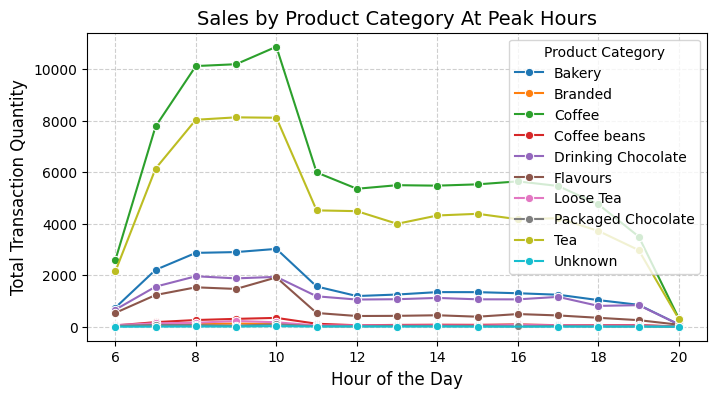

In [ ]:
# Calculating transaction qty for each product at peak hours
df["hour"] = pd.to_datetime(df["tra_datetime"]).dt.hour
category_sales_by_hour = df.groupby(["hour", "product_category"])["transaction_qty"].sum().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(x='hour',
             y='transaction_qty',
             hue='product_category',
             data=category_sales_by_hour,
             marker='o')
plt.title("Sales by Product Category At Peak Hours", fontsize=14, )
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Total Transaction Quantity", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Product Category", fontsize=10)
plt.show()

## Customer Preferences by Store Location
In all store locations, coffee has the highest selling category.

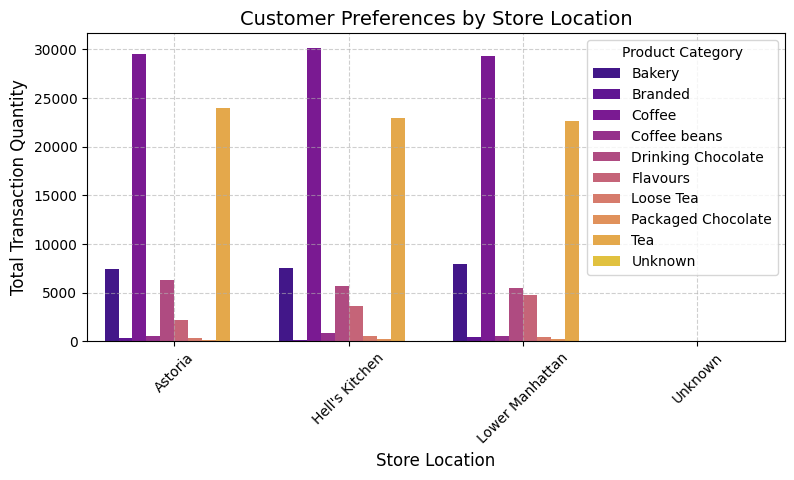

In [ ]:
# Grouping by store location and product category
store_category_sales = df.groupby(['store_location', 'product_category'])['transaction_qty'].sum().reset_index()
plt.figure(figsize=(9, 4))
sns.barplot(x='store_location',
            y='transaction_qty',
            hue='product_category',
            data=store_category_sales,
            palette='plasma')
plt.title("Customer Preferences by Store Location", fontsize=14,)
plt.xlabel("Store Location", fontsize=12)
plt.ylabel("Total Transaction Quantity", fontsize=12)
plt.legend(title="Product Category", fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Conclusion
*   Coffee and tea have high transactions.
*   Hell's and Lower Manhattan are the best locations for high transactions.
*   Sales increase from 8am - 10 am.
*   Barista espresso and Brewed chai tea generate highest revenue
*   Dark chocolate and Spicy eye opener chai have minimum transaction quantity.
*   I recommend applying classification models like decision trees or random forest, we can predict customer behavior and we can also predict best unit price.


